In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Kaytie/Desktop/School/data.csv', parse_dates=[0,1])

In [3]:
print(df)

    Start date   End date
0   2019-08-14 2019-08-23
1   2019-08-07 2019-08-19
2   2019-08-07 2019-08-29
3   2019-08-06 2019-08-19
4   2019-08-12 2019-08-22
..         ...        ...
104 2019-08-13 2019-08-17
105 2019-08-12 2019-08-14
106 2019-08-05 2019-08-10
107 2019-08-06 2019-08-14
108 2019-08-12 2019-08-15

[109 rows x 2 columns]


In [4]:
from datetime import datetime

In [5]:
df['diff'] = (df['End date'] - df['Start date']).dt.days

In [6]:
print(df)

    Start date   End date  diff
0   2019-08-14 2019-08-23   9.0
1   2019-08-07 2019-08-19  12.0
2   2019-08-07 2019-08-29  22.0
3   2019-08-06 2019-08-19  13.0
4   2019-08-12 2019-08-22  10.0
..         ...        ...   ...
104 2019-08-13 2019-08-17   4.0
105 2019-08-12 2019-08-14   2.0
106 2019-08-05 2019-08-10   5.0
107 2019-08-06 2019-08-14   8.0
108 2019-08-12 2019-08-15   3.0

[109 rows x 3 columns]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start date  107 non-null    datetime64[ns]
 1   End date    104 non-null    datetime64[ns]
 2   diff        102 non-null    float64       
dtypes: datetime64[ns](2), float64(1)
memory usage: 2.7 KB


In [8]:
df.dropna(inplace=True)

In [9]:
category=df.groupby('diff')\
        .agg(under=pd.NamedAgg(column='diff', aggfunc=lambda x: (x < 8).sum()),
            over=pd.NamedAgg(column='diff',  aggfunc=lambda x: (x > 7).sum()))\
        .reset_index()

In [10]:
category

,diff,under,over
0,-4.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,2.0,0.0
3,2.0,7.0,0.0
4,3.0,4.0,0.0
5,4.0,5.0,0.0
6,5.0,4.0,0.0
7,6.0,10.0,0.0
8,7.0,23.0,0.0
9,8.0,0.0,3.0


In [11]:
category_p = category[['under', 'over']]
category_p.head()

,under,over
0,1.0,0.0
1,1.0,0.0
2,2.0,0.0
3,7.0,0.0
4,4.0,0.0


In [12]:
category_p.columns = ['pass', 'fail']
category_p.head()

,pass,fail
0,1.0,0.0
1,1.0,0.0
2,2.0,0.0
3,7.0,0.0
4,4.0,0.0


In [13]:
category_pf = category_p.sum()
category_pf.head()

pass    57.0
fail    45.0
dtype: float64

Text(0, 0.5, 'Amount')

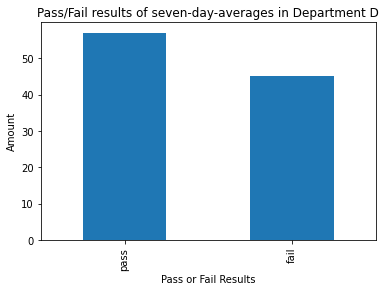

In [14]:
my_plot = category_pf.plot(kind='bar',title="Pass/Fail results of seven-day-averages in Department")
my_plot.set_xlabel("Pass or Fail Results")
my_plot.set_ylabel("Amount")